In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

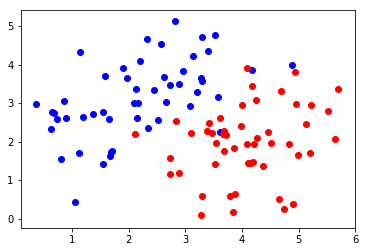

In [2]:
# generate random data
N1, N2 = 50, 50
mean1, cov1 = np.array([2,3]), np.matrix([[1., 0.5],[0.5, 1.]])
mean2, cov2 = np.array([4,2]), np.matrix([[1., 0.5],[0.5, 1.]])
cluster_1_data = np.random.multivariate_normal(mean1, cov2, N1)
cluster_2_data = np.random.multivariate_normal(mean2, cov2, N2)

X = np.r_[cluster_1_data, cluster_2_data]
y = np.r_[np.zeros((len(cluster_1_data),1)), np.ones((len(cluster_2_data),1))].flatten()

plt.scatter(cluster_1_data[:,0], cluster_1_data[:,1], facecolors='b')
plt.scatter(cluster_2_data[:,0], cluster_2_data[:,1], facecolors='r')

In [3]:
def eval_classifier(clf, X, y):
    model = clf.train(X, y)

    y_pred = model.predict(X).flatten()
    # actual in outer circle
    plt.scatter(cluster_1_data[:,0], cluster_1_data[:,1], s=40, facecolors='blue')
    plt.scatter(cluster_2_data[:,0], cluster_2_data[:,1], s=40, facecolors='red')
    # predictions in inner circles
    plt.scatter(X[y_pred==0,0], X[y_pred==0,1], s=10, facecolors='blue')
    plt.scatter(X[y_pred==1,0], X[y_pred==1,1], s=10, facecolors='red')

    # plot discriminant line
    xs = np.linspace(0,6,100)
    plt.plot(xs, model.disc_line(xs))

    print('{:.2f}% error rate'.format(100 * np.not_equal(y,y_pred).sum()/(X.shape[0])))

In [4]:
# Implement Fishers linear discriminant
class FishersTwoClassLinearDiscriminantClassifier(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        K = X.shape[1]
        X0, X1 = X[y==0,:], X[y==1,:]
        
        m0 = X0.mean(axis=0).reshape((1,K))
        m1 = X1.mean(axis=0).reshape((1,K))
        
        within_covariance = np.zeros((K,K))
        for i in range(X0.shape[0]):
            x0 = X0[i,:].reshape((1,K))
            within_covariance += np.dot(np.transpose(x0 - m0), x0 - m0)
        for i in range(X1.shape[0]):
            x1 = X1[i,:].reshape((1,K))
            within_covariance += np.dot(np.transpose(x1 - m1), x1 - m1)
        
        self.w = np.dot(np.linalg.inv(within_covariance), np.transpose(m1 - m0))
        self.w = self.w / np.linalg.norm(self.w)
        self.m = X.mean(axis=0)
        return self
    
    def predict(self, X):
        return np.dot(X - self.m, self.w) >= 0
    
    def disc_line(self, xs):
        return (self.m[1] - self.w[0]/self.w[1]*(xs - self.m[0])).flatten()

6.00% error rate


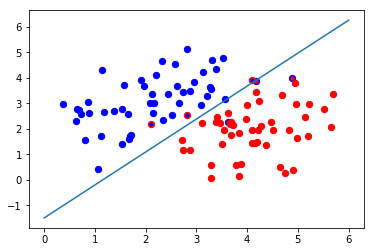

In [5]:
model = FishersTwoClassLinearDiscriminantClassifier()

eval_classifier(model, X, y)

In [6]:
# 4.1.7 - Perceptron algorithm
# Implement Fishers linear discriminant
class PerceptronClassifier(object):
    def __init__(self, phi):
        self.phi = phi # function, from input to feature space
        
    def _transform(self, X):
        return np.apply_along_axis(self.phi, axis=1, arr=X)
    
    def train(self, X, y):
        X, y = np.copy(X), np.copy(y)
        
        N = X.shape[0]
        permutation = np.random.permutation(N)
        X, y = X[permutation], y[permutation]
        
        y[y == 0] = -1 # transform any 0's to -1's
        X = self._transform(X)

        K = X.shape[1]
        self.w = np.random.normal(0,1e-1,K)
        
        for i in range(N):
            is_correct = np.dot(self.w, X[i,:]) * y[i] > 0
            self.w = self.w + (0 if is_correct else X[i,:] * y[i])
        return self
    
    def predict(self, X):
        return np.dot(self._transform(X), self.w) > 0
    
    def disc_line(self, xs):
        return ((-self.w[0]-self.w[1]*xs)/self.w[2]).flatten()

6.00% error rate


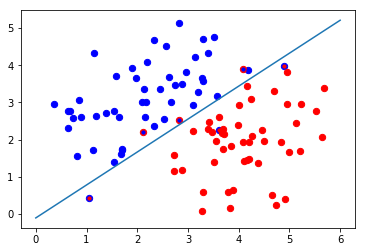

In [9]:
phi = lambda x: np.insert(x,0,1)
model = PerceptronClassifier(phi)

eval_classifier(model, X, y)

In [8]:
# TODO: Create visualization of perceptron learning algorithm (disc line over time)